## Overview of this notebook 

This notebook is essentially the same notebook as [Alexey Grigorev's lesson in Deep Learning in his Machine Learning Engineering course](https://github.com/alexeygrigorev/mlbookcamp-code/tree/master/course-zoomcamp/08-deep-learning), just that this is done in PyTorch instead of Keras. Reason being that it's always nice to learn about another library instead of sticking to just one. I have not touched PyTorch at all and this is my first time learning about PyTorch. 

## Things to download: 

Before we continue, there is a [guide for downloading PyTorch](https://pytorch.org/get-started/locally/) from the people from PyTorch themselves. 

We are specifically dealing with Computer Vision here, and therefore we will be only using PyTorch and TorchVision. 

For PyTorch, we will have to make sure that we have a compatible CUDA toolkit version - PyTorch tends to use 10.2 or 11.3 for CUDA toolkit, so you can use a separate environment to download the different CUDA toolkit. 


# 8. Neural networks and deep learning

This week, we'll learn about neural nets and build a model
for classifying images of clothes


## 8.1 Fashion classification
We will be doing multi-class classification with this dataset.

Dataset: 

* Full: https://github.com/alexeygrigorev/clothing-dataset
* Small: https://github.com/alexeygrigorev/clothing-dataset-small

Links:

* https://cs231n.github.io/

In [54]:
# If you have not cloned the dataset yet, you can use !git 

# !git clone https://github.com/alexeygrigorev/clothing-dataset-small.git 

## 8.2 PyTorch

* Installing Pytorch
* Loading images

In [55]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [56]:
import torch
import torchvision

# i should have imported torch.nn as nn, but I did not! 
# It is common practice but it was a little late once I finished, my apologies.

Unlike Keras, PyTorch does not have a function whereby it allows you to read imaged directly, and therefore we wwill have to use matplotlib to show the image instead. 

In [57]:
path = './clothing-dataset-small/train/t-shirt/'

# Since the file path can be super long as seen from the name, we can use f-strings to piece them together
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'

fullname = f'{path}/{name}'
test_image = torchvision.io.read_image(fullname)
test_image.shape

torch.Size([3, 533, 400])

In [58]:
# This is how matplotlib reads the image
import matplotlib.image as mpimg

img = mpimg.imread(fullname)
img.shape

(533, 400, 3)

This is quite interesting, as PyTorch does not read the image the same way as how matplotlib (or Keras, actually) would read it.

If we want to see how our image looks like, we can use Pillow instead, which is a module that you have to download that allows us to read images.  

In [59]:
from PIL import Image

In [60]:
img = Image.open(fullname).convert('RGB')

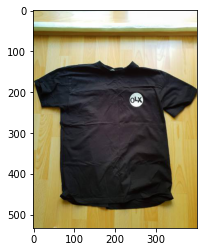

In [61]:
plt.imshow(img)

This, however, does not solve the fact that we need pictures with the same aspects. For this, we will need to put this through a pipeline whereby the pictures are all the same size. 

In [62]:
import torchvision.transforms as transforms

# We have to resize the picture using transforms, in this case 
resize = transforms.Compose([transforms.Resize(size = (299,299))])

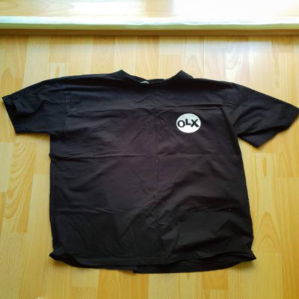

In [63]:
img = resize(img)
img

## How is a picture stored?
A picture is stored as a numpy array. This is possible as essentially a picture is made out of pixels.
Each pixle has a certain value for Red, Green and Blue.
Combining them together, we come up with a colour.
With this, the image is stored as a 3d array, with each row being RGB values.

In [64]:
x = np.array(img)
x

array([[[179, 171, 100],
        [179, 170, 100],
        [180, 171, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 253, 247]],

       [[189, 180, 113],
        [188, 179, 112],
        [188, 179, 111],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 127],
        [200, 190, 127],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[168, 154,  79],
        [172, 158,  83],
        [172, 158,  83],
        ...,
        [182, 134,  24],
        [181, 133,  23],
        [182, 134,  24]],

       [[167, 153,  78],
        [172, 158,  83],
        [172, 158,  83],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[167, 153,  78],
        [172, 158,  83],
        [172, 158,  83],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [181, 133,  22]]

## 8.3 Pre-trained convolutional neural networks

* Imagenet dataset: https://www.image-net.org/
* Pre-trained models: https://keras.io/api/applications/

Since PyTorch doesn't have the Xception model by default, we will be using another model that has a slightly lower accuracy than the Xception model called InceptionV3.

While TensorFlow allows us to put in an input_shape in the model, we have to set the image size ourselves in PyTorch using transforms.Resize(). 

PyTorch also provides weights trained from ImageNet. 

In [65]:
model = torchvision.models.inception_v3(pretrained = True)

In [66]:
# preprocessing_input 
preprocess = transforms.Compose([transforms.Resize(size = (299,299)),
                                 transforms.ToTensor(),
                                 transforms.Normalize(
                                     mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]
                                 )])

In [67]:
img = Image.open(fullname).convert('RGB')
x = np.array(img)
x

array([[[179, 171,  99],
        [179, 171,  99],
        [179, 171,  99],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 253, 248]],

       [[178, 169, 100],
        [177, 168,  99],
        [177, 168,  99],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 254, 247]],

       [[188, 179, 110],
        [188, 179, 110],
        [187, 178, 109],
        ...,
        [251, 252, 247],
        [251, 252, 246],
        [251, 252, 246]],

       ...,

       [[165, 151,  76],
        [170, 156,  81],
        [173, 159,  84],
        ...,
        [180, 132,  21],
        [181, 133,  22],
        [182, 134,  23]],

       [[165, 151,  76],
        [170, 156,  81],
        [173, 159,  84],
        ...,
        [180, 132,  21],
        [181, 133,  22],
        [182, 134,  23]],

       [[165, 151,  76],
        [170, 156,  81],
        [173, 159,  84],
        ...,
        [179, 131,  20],
        [180, 132,  21],
        [182, 134,  23]]

In [68]:
img = preprocess(img)
img_tensor = torch.unsqueeze(img, 0)

In [69]:
img_tensor[0]

tensor([[[ 0.9474,  0.9474,  0.9646,  ...,  2.1804,  2.1804,  2.1804],
         [ 1.1187,  1.1015,  1.1015,  ...,  2.1804,  2.1804,  2.1804],
         [ 1.2899,  1.3070,  1.3070,  ...,  2.1633,  2.1633,  2.1633],
         ...,
         [ 0.7591,  0.8276,  0.8276,  ...,  0.9988,  0.9817,  0.9988],
         [ 0.7419,  0.8276,  0.8276,  ...,  0.9988,  0.9646,  0.9988],
         [ 0.7419,  0.8276,  0.8276,  ...,  0.9817,  0.9474,  0.9817]],

        [[ 0.9580,  0.9405,  0.9580,  ...,  2.3936,  2.3936,  2.3936],
         [ 1.1155,  1.0980,  1.0980,  ...,  2.3761,  2.3761,  2.3761],
         [ 1.2731,  1.2906,  1.2906,  ...,  2.3585,  2.3585,  2.3585],
         ...,
         [ 0.6604,  0.7304,  0.7304,  ...,  0.3102,  0.2927,  0.3102],
         [ 0.6429,  0.7304,  0.7304,  ...,  0.3102,  0.2752,  0.3102],
         [ 0.6429,  0.7304,  0.7304,  ...,  0.2927,  0.2577,  0.2927]],

        [[-0.0615, -0.0615, -0.0441,  ...,  2.5180,  2.5180,  2.5006],
         [ 0.1651,  0.1476,  0.1302,  ...,  2

In [70]:
model.eval()
out = model(img_tensor)

Unlike Keras/Tensorflow, PyTorch does not have the classes stored within the module itself. Therefore, we have to download it from somewhere else. Here is [a github link](https://github.com/Lasagne/Recipes/blob/master/examples/resnet50/imagenet_classes.txt) for the document.

In [71]:
with open("imagenet_classes.txt") as f:
    classes = [line.strip() for line in f.readlines()]

In [72]:
def decode_predictions(output, classes):
    _, indices = torch.sort(output, descending=True)
    percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
    return [(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]

In [73]:
decode_predictions(out, classes)

[('jersey, T-shirt, tee shirt', 86.00975036621094),
 ('bulletproof vest', 3.0739073753356934),
 ('sweatshirt', 0.8914203643798828),
 ('maillot', 0.3669062852859497),
 ('velvet', 0.0987624078989029)]

Not having pre-set classes might be a good thing though, as in the TensorFlow classes, we only have "jersey" instead of the full "jersey, T-shirt, tee shirt" class. However, we do not have the decode_predictions function so we have to create it ourselves.

## 8.4 Convolutional neural networks

* Types of layers: convolutional and dense 
* Convolutional layers and filters
* Dense layers

There are more layers. Read here: https://cs231n.github.io/

In a Convolutional Neural Network (CNN), there are two main types of layers: 

### 1. Convolutional Layers
The role of a convolutional layer is to essentially extract a vector representation of an image.

In a convolutional layer, we have "filters" that are slid over the image. From there, a similarity score is being counted. These filters have a similarity score between 0 and 10. All of these scores are the compiled into a feature map, which we get per filler. The feature maps are then passed through another layer to create another feature map. This will be repeated until the dense layer, whereby a vector representation of an image is being produced before putting it through the dense layer.

The higher the similarity score, the higher the similarity. 

For example, we can imagine* that we have a filter that has a curve, and while for most of the image it does not match, near the OLX logo there seems to be a curve, and therefore there will be an increased similarity score around that area itself.

\* = Filters don't exactly look like that, they're applied to a certain area instead and more filters are created from there. 

### 2. Dense Layers
The role of a dense layer is to make predictions. Essentially, the dense layer is the layer that processes the vector representation through a whole series of matrix multiplication, to give us a multi-class output. There can be more than 1 dense output in a neural network.

e.g. We want to make a binary classification model - is it a T-shirt or not?

For y = {0,1}, 0 = Not T-shirt, 1 = T-shirt

Our model g(x) would look like: g(x) = sigmoid(X^T w), and we will produce a probability that it is a T-shirt.

Now, we can do that for each class, whereby we create the regression and make it a logistic one with a sigmoid function.

## 8.5 Transfer learning

* Reading data with `ImageDataGenerator`
* Train `InceptionV3` on smaller images (150x150)

(GPU and CPU enabled)

The convolutional layers in the ImageNet model itself is rather generic, and therefore we do not need to change it. The vector representation that comes out of those convolutional layers are also rather useful. This is because deep learning models require a lot of data in order to have these convolutional layers. 

However, that is not the case behind the dense layers, which are rather specific to imagenet itself and therefore will not be very useful if we are going to base a new deep learning model based on ImageNet. e.g. For ImageNet, we have a "bulletproof_vest" shirt, but that's not very evident in our clothing dataset. 

Therefore, we take the convolutional layers and remove the dense layers, and we'll be transferring this onto another model. That is the idea behind transfer learning.

In [74]:
preprocess = transforms.Compose([transforms.Resize(size = (299,299)),
                                 transforms.ToTensor(),
                                 transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                 ])

In [75]:
# What device we will be using to train our model. Don't worry if you don't have a GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# This is the equivalent of the ImageDataGenerator in Keras.
train_folder = torchvision.datasets.ImageFolder('./clothing-dataset-small/train', transform=preprocess)

# Reading from Directory, batch_size = how many images that will be read at once
train_data = torch.utils.data.DataLoader(dataset= train_folder, batch_size = 32, shuffle=True, pin_memory = True)


In [76]:
# To find the classes;
train_folder.classes

['dress',
 'hat',
 'longsleeve',
 'outwear',
 'pants',
 'shirt',
 'shoes',
 'shorts',
 'skirt',
 't-shirt']

In [77]:
# To get a next batch of the dataset, we use next() and iter() for PyTorch
X,y = next(iter(train_data))

In [78]:
# Interesting observation - PyTorch uses a classification system that is similar to Label Encoding
# Keras uses a classification system similar to One-Hot Encoding instead
y[:5]

tensor([9, 9, 0, 2, 4])

In [79]:
# same thing for Validation
val_folder = torchvision.datasets.ImageFolder('./clothing-dataset-small/validation', transform=preprocess)

val_data = torch.utils.data.DataLoader(dataset= val_folder, batch_size = 32, shuffle=True, pin_memory = True)

In [ ]:
base_model = torchvision.models.inception_v3(pretrained = True)
base_model.aux_logits = False

# base_model.trainable equivalent
for param in base_model.parameters():
    param.requires_grad = False
    
# uncomment to see the whole base_model, commented for visibility in GitHub
# base_model

As mentioned, we want to change the dense layers as it is not useful to us. We can tell that for the architecture, there is already pooling in the model, and therefore we do not need that. 

I did some searching, and believe that the most optimal way is to edit the last 'fc' layer with our own layers.

However, I will create a different model to showcase what else we can do within the 'fc' layer.

In [ ]:
num_ftrs = base_model.fc.in_features
base_model.fc = torch.nn.Linear(num_ftrs, 10)
    
#set it to cuda

base_model = base_model.to('cuda')

# This cell was ran before, had to clear the base_model output 

In [ ]:
# We can do more stuff by changing the 'fc' layer.
# We can add in more linear layers, add in an activation layer, etc. 

base_model_2 = torchvision.models.inception_v3(pretrained = True)

# base_model.trainable equivalent
for param in base_model_2.parameters():
    param.requires_grad = False
    
num_ftrs = base_model_2.fc.in_features

# Changing .fc with more models
base_model_2.fc = torch.nn.Sequential(torch.nn.Linear(num_ftrs, 1000),
                                    torch.nn.ReLU(),
                                    torch.nn.Linear(1000,100),
                                    torch.nn.ReLU(),
                                    torch.nn.Linear(100,10)
)

# This cell was ran before, had to clear the base_model_2 output 
# base_model_2

In [83]:
import torch.optim as optim 

learning_rate = 0.01 

optimizer = optim.Adam(base_model.parameters(), lr = learning_rate)

# CategoryCrossentropy() in Keras
criterion = torch.nn.CrossEntropyLoss()

We do not actually have a training function in PyTorch, and therefore we have to create our own function instead.

In [84]:
# These will help us for the function
dataloaders = {'train': train_data, 'val': val_data}

dataset_sizes = {'train': len(train_folder), 'val': len(val_folder)}

class_names = train_folder.classes

In [104]:
# Original Reference: PyTorch website about transfer learning
# Removed scheduler because the original model used for this function had a learning rate decay 
# Added lists for loss and accuracy

import time 
import copy

def train_model(model, criterion, optimizer, num_epochs=25):
    since = time.time()
    
    loss_list = []
    acc_list = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            
            loss_list.append(epoch_loss)
            acc_list.append(float(epoch_acc.cpu()))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return loss_list, acc_list

For reference to the function: the website is [here](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html).

In [93]:
train = train_model(base_model, criterion, optimizer, num_epochs = 10)

Epoch 1/10
----------
train Loss: 1.2253 Acc: 0.6529
val Loss: 1.4064 Acc: 0.6129

Epoch 2/10
----------
train Loss: 1.1664 Acc: 0.6913
val Loss: 1.0556 Acc: 0.6686

Epoch 3/10
----------
train Loss: 1.1925 Acc: 0.6864
val Loss: 1.0479 Acc: 0.7331

Epoch 4/10
----------
train Loss: 1.2993 Acc: 0.6923
val Loss: 1.0522 Acc: 0.7507

Epoch 5/10
----------
train Loss: 1.1540 Acc: 0.7200
val Loss: 1.1792 Acc: 0.7273

Epoch 6/10
----------
train Loss: 1.2549 Acc: 0.7070
val Loss: 1.1477 Acc: 0.6979

Epoch 7/10
----------
train Loss: 1.3382 Acc: 0.7119
val Loss: 1.1337 Acc: 0.7331

Epoch 8/10
----------
train Loss: 1.4219 Acc: 0.6972
val Loss: 1.1309 Acc: 0.7478

Epoch 9/10
----------
train Loss: 1.4125 Acc: 0.7099
val Loss: 1.1871 Acc: 0.7390

Epoch 10/10
----------
train Loss: 1.2919 Acc: 0.7275
val Loss: 1.1093 Acc: 0.7654

Training complete in 5m 12s
Best val Acc: 0.765396


In [96]:
import pandas as pd

# Use a function to return a dataframe for loss and accuracy 
def results(metrics):
    training_loss = metrics[0][::2]
    val_loss = metrics[0][1::2]
    training_acc = metrics[1][::2]
    val_acc = metrics[1][1::2]
    d = {'train_loss': training_loss, 'val_loss': val_loss, 'train_acc': training_acc, 'val_acc': val_acc}
    df = pd.DataFrame(data = d)
    return df

In [52]:
float(train[1][1].cpu())

0.7331378299120235

In [99]:
df = results(train)

In [92]:
results(train)

,Training Loss,Validation Loss,Training Accuracy,Validation Accuracy
0,1.729466,1.025293,0.511734,0.627566


<function matplotlib.pyplot.legend(*args, **kwargs)>

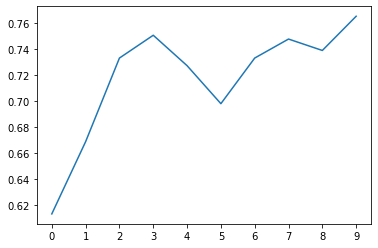

In [102]:
# plt.plot(df['train_acc'], label = 'train')
plt.plot(df['val_acc'], label = 'val')
plt.xticks(np.arange(10))
plt.legend

The accuracy of the validation dataset is hovering around 74%, with some variation here and there. 

## 8.6 Adjusting the learning rate

* What's the learning rate
* Trying different values

### What is learning rate?
Think of a learning rate as how fast you read.
The faster the learning rate, the more the model overfits (and vice versa). 

In [112]:
base_model = torchvision.models.inception_v3(pretrained = True)
base_model.aux_logits = False

for param in base_model.parameters():
    param.requires_grad = False
        
num_ftrs = base_model.fc.in_features
base_model.fc = torch.nn.Linear(num_ftrs, 10)
    
base_model = base_model.to('cuda')

In [120]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = optim.Adam(base_model.parameters(), lr = learning_rate)
    
    train = train_model(base_model, criterion, optimizer, num_epochs = 10)
    scores[lr] = results(train)
    
    print()
    print()

0.0001
Epoch 1/10
----------
train Loss: 1.6154 Acc: 0.7383
val Loss: 1.6203 Acc: 0.7331

Epoch 2/10
----------
train Loss: 1.8222 Acc: 0.7174
val Loss: 1.4099 Acc: 0.7713

Epoch 3/10
----------
train Loss: 1.6832 Acc: 0.7337
val Loss: 1.3607 Acc: 0.7771

Epoch 4/10
----------
train Loss: 1.7245 Acc: 0.7252
val Loss: 1.4768 Acc: 0.7625

Epoch 5/10
----------
train Loss: 1.7283 Acc: 0.7282
val Loss: 1.4466 Acc: 0.7478

Epoch 6/10
----------
train Loss: 1.6606 Acc: 0.7304
val Loss: 1.5340 Acc: 0.7449

Epoch 7/10
----------
train Loss: 1.6190 Acc: 0.7464
val Loss: 1.4759 Acc: 0.7859

Epoch 8/10
----------
train Loss: 1.5303 Acc: 0.7503
val Loss: 1.4061 Acc: 0.7713

Epoch 9/10
----------
train Loss: 1.9549 Acc: 0.7158
val Loss: 1.9416 Acc: 0.7273

Epoch 10/10
----------
train Loss: 1.9712 Acc: 0.7177
val Loss: 1.4547 Acc: 0.7713

Training complete in 5m 19s
Best val Acc: 0.785924


0.001
Epoch 1/10
----------
train Loss: 1.7646 Acc: 0.7317
val Loss: 1.8249 Acc: 0.7390

Epoch 2/10
---------

In [137]:
del scores[0.0001]
del scores[0.1]

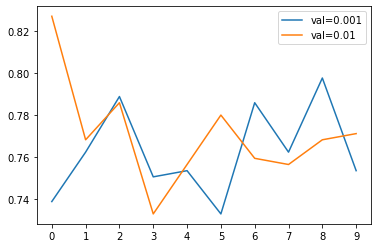

In [138]:
for lr, hist in scores.items():
    # plt.plot(hist['train_acc'], label = 'train=%s' % lr)
    plt.plot(hist['val_acc'], label = 'val=%s' % lr)
    
plt.xticks(np.arange(10))
plt.legend()

We can kind of tell here that learning_rate = 0.0001 is underperforming here, therefore we will not be using it 

In [139]:
learning_rate = 0.01 

## 8.7 Checkpointing

* Saving the best model only
* Training a model with callbacks

In [145]:
# Infrastructure of checkpointing referenced from other code

import time 
import copy

def train_model(model, criterion, optimizer, num_epochs=25):
    since = time.time()
    
    loss_list = []
    acc_list = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            
            loss_list.append(epoch_loss)
            acc_list.append(float(epoch_acc.cpu()))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                is_best = epoch_acc > best_acc
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                
        ###################### Checkpointing ######################
                save_checkpoint({
                    'epoch': epoch +1,
                    'state_dict': model.state_dict(),
                    'best_acc': best_acc,
                    'optimizer': optimizer.state_dict()
                }, is_best)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return loss_list, acc_list

In [146]:
import shutil 
def save_checkpoint(state, is_best, filename='checkpoint.pth.tar'):
    torch.save(state, filename)
    if is_best:
        shutil.copyfile(filename, 'model_best.pth.tar')

In [147]:
base_model = torchvision.models.inception_v3(pretrained = True)
base_model.aux_logits = False

for param in base_model.parameters():
    param.requires_grad = False
        
num_ftrs = base_model.fc.in_features
base_model.fc = torch.nn.Linear(num_ftrs, 10)
    
base_model = base_model.to('cuda')

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(base_model.parameters(), lr = 0.01)
train = train_model(base_model, criterion, optimizer, num_epochs = 10)

Epoch 1/10
----------
train Loss: 1.6434 Acc: 0.5342
val Loss: 0.9554 Acc: 0.6921

Epoch 2/10
----------
train Loss: 1.1904 Acc: 0.6486
val Loss: 0.9589 Acc: 0.6921

Epoch 3/10
----------
train Loss: 1.1712 Acc: 0.6783
val Loss: 0.8674 Acc: 0.7537

Epoch 4/10
----------
train Loss: 1.3656 Acc: 0.6708
val Loss: 1.0618 Acc: 0.7243

Epoch 5/10
----------
train Loss: 1.2922 Acc: 0.6920
val Loss: 0.9756 Acc: 0.7507

Epoch 6/10
----------
train Loss: 1.3261 Acc: 0.6978
val Loss: 1.0593 Acc: 0.7361

Epoch 7/10
----------
train Loss: 1.2389 Acc: 0.7047
val Loss: 1.4241 Acc: 0.6979

Epoch 8/10
----------
train Loss: 1.5171 Acc: 0.6933
val Loss: 1.5317 Acc: 0.6921

Epoch 9/10
----------
train Loss: 1.3909 Acc: 0.7096
val Loss: 1.1595 Acc: 0.7449

Epoch 10/10
----------
train Loss: 1.2599 Acc: 0.7285
val Loss: 1.2359 Acc: 0.7331

Training complete in 4m 58s
Best val Acc: 0.753666


In [154]:
# You need to load the base model first before anything 
base_model = torchvision.models.inception_v3(pretrained = True)
base_model.aux_logits = False

for param in base_model.parameters():
    param.requires_grad = False
        
num_ftrs = base_model.fc.in_features
base_model.fc = torch.nn.Linear(num_ftrs, 10)
    
base_model = base_model.to('cuda')

# Don't forget the optimizer
optimizer = optim.Adam(base_model.parameters(), lr = 0.01)

In [164]:
checkpoint = torch.load('model_best.pth.tar')
base_model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])
epoch = checkpoint['epoch']
acc = checkpoint['best_acc']

Added checkpointing, referred from this [github code](https://github.com/pytorch/examples/blob/537f6971872b839b36983ff40dafe688276fe6c3/imagenet/main.py#L237) 

## 8.8 Adding more layers


* Adding one inner dense layer
* Experimenting with different sizes of inner layer

Let's say that we want to add in another inner layer with a activation ReLU function. We can easily do that by once again replacing the .fc layer.

In [171]:
def make_model(inner_size = 100):
    base_model = torchvision.models.inception_v3(pretrained = True)
    base_model.aux_logits = False

    for param in base_model.parameters():
        param.requires_grad = False
        
    num_ftrs = base_model.fc.in_features
    
    # Adding in the dense layer
    base_model.fc = torch.nn.Sequential(torch.nn.Linear(num_ftrs, inner_size),
                                        torch.nn.ReLU(),
                                        torch.nn.Linear(inner_size, 10))
    base_model = base_model.to('cuda')
    return base_model

In [173]:
learning_rate = 0.01

scores_size = {}

for size in [10,100,1000]:
    print(size)
    
    base_model = make_model(inner_size = size)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = optim.Adam(base_model.parameters(), lr = learning_rate)
    
    train = train_model(base_model, criterion, optimizer, num_epochs = 10)
    scores_size[size] = results(train)
    
    print()
    print()

10
Epoch 1/10
----------
train Loss: 1.8868 Acc: 0.3400
val Loss: 1.6723 Acc: 0.3695

Epoch 2/10
----------
train Loss: 1.6560 Acc: 0.4003
val Loss: 1.6544 Acc: 0.3754

Epoch 3/10
----------
train Loss: 1.6358 Acc: 0.4110
val Loss: 1.7696 Acc: 0.3607

Epoch 4/10
----------
train Loss: 1.5577 Acc: 0.4335
val Loss: 1.5285 Acc: 0.4076

Epoch 5/10
----------
train Loss: 1.5331 Acc: 0.4426
val Loss: 1.4965 Acc: 0.4223

Epoch 6/10
----------
train Loss: 1.5201 Acc: 0.4505
val Loss: 1.4750 Acc: 0.4194

Epoch 7/10
----------
train Loss: 1.4664 Acc: 0.4661
val Loss: 1.4300 Acc: 0.4340

Epoch 8/10
----------
train Loss: 1.4629 Acc: 0.4726
val Loss: 1.4065 Acc: 0.4780

Epoch 9/10
----------
train Loss: 1.4559 Acc: 0.4778
val Loss: 1.3680 Acc: 0.5191

Epoch 10/10
----------
train Loss: 1.4273 Acc: 0.4958
val Loss: 1.3507 Acc: 0.5073

Training complete in 4m 42s
Best val Acc: 0.519062


100
Epoch 1/10
----------
train Loss: 1.7699 Acc: 0.4182
val Loss: 1.3390 Acc: 0.4985

Epoch 2/10
----------
trai

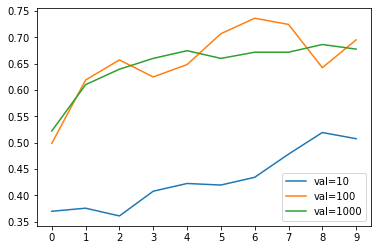

In [174]:
for size, hist in scores_size.items():
    plt.plot(hist['val_acc'], label = ('val=%s' % size))
    
plt.xticks(np.arange(10))
plt.legend()

In [175]:
size = 100

## 8.9 Regularization and dropout

* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values

Dropout: Randomly freezing part of a network when we train. 
### Analogy 
For example, if we have a shirt with an OLX logo and we train 10 times, the neural network might recognise it such that if the logo is seen, it will definitely mean that it is a shirt. This is bad since if we have another article of clothing (e.g. hat) that has that OLX logo, it will be classified as a shirt instead of a hat, which is wrong. 

If we block a part of the picture, it will make it such that there is a chance where the blockage will block the OLX logo, so as to prevent such a situation. 



In [203]:
def make_model(inner_size = 100, droprate = 0.5):
    base_model = torchvision.models.inception_v3(pretrained = True)
    base_model.aux_logits = False

    for param in base_model.parameters():
        param.requires_grad = False
        
    num_ftrs = base_model.fc.in_features
    
    # Adding in the dense layer
    base_model.fc = torch.nn.Sequential(torch.nn.Linear(num_ftrs, inner_size),
                                        torch.nn.ReLU(),
                                        torch.nn.Dropout(droprate),
                                        torch.nn.Linear(inner_size, 10))
    base_model = base_model.to('cuda')
    return base_model

In [205]:
learning_rate = 0.01
size = 100 

scores_dropout = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)
    
    base_model = make_model(droprate = droprate, inner_size = size)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = optim.Adam(base_model.parameters(), lr = learning_rate)
    
    train = train_model(base_model, criterion, optimizer, num_epochs = 10)
    scores_dropout[droprate] = results(train)
    
    print()
    print()

0.0
Epoch 1/10
----------
train Loss: 1.6017 Acc: 0.4664
val Loss: 1.4855 Acc: 0.4633

Epoch 2/10
----------
train Loss: 1.1911 Acc: 0.5955
val Loss: 1.0496 Acc: 0.6364

Epoch 3/10
----------
train Loss: 0.9446 Acc: 0.6711
val Loss: 0.8114 Acc: 0.7126

Epoch 4/10
----------
train Loss: 0.9756 Acc: 0.6620
val Loss: 0.8899 Acc: 0.7038

Epoch 5/10
----------
train Loss: 0.9080 Acc: 0.6842
val Loss: 0.8212 Acc: 0.7185

Epoch 6/10
----------
train Loss: 0.8883 Acc: 0.6923
val Loss: 0.8414 Acc: 0.7185

Epoch 7/10
----------
train Loss: 0.8648 Acc: 0.7099
val Loss: 0.9027 Acc: 0.7097

Epoch 8/10
----------
train Loss: 0.8678 Acc: 0.6956
val Loss: 0.7772 Acc: 0.7478

Epoch 9/10
----------
train Loss: 0.8505 Acc: 0.7080
val Loss: 0.8703 Acc: 0.6979

Epoch 10/10
----------
train Loss: 0.8365 Acc: 0.7184
val Loss: 0.8165 Acc: 0.7302

Training complete in 4m 47s
Best val Acc: 0.747801


0.2
Epoch 1/10
----------
train Loss: 1.8280 Acc: 0.3885
val Loss: 1.2539 Acc: 0.5484

Epoch 2/10
----------
tra

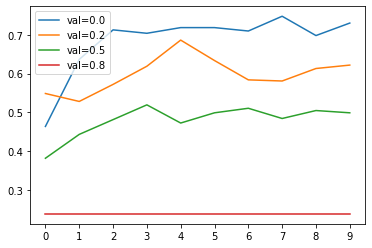

In [208]:
for droprate, hist in scores_dropout.items():
    plt.plot(hist['val_acc'], label = ('val=%s' % droprate))
    
plt.xticks(np.arange(10))
plt.legend()

We'll remove the dropout layer! 

In [209]:
# Final model
def make_model(inner_size = 100):
    base_model = torchvision.models.inception_v3(pretrained = True)
    base_model.aux_logits = False

    for param in base_model.parameters():
        param.requires_grad = False
        
    num_ftrs = base_model.fc.in_features
    
    # Adding in the dense layer
    base_model.fc = torch.nn.Sequential(torch.nn.Linear(num_ftrs, inner_size),
                                        torch.nn.ReLU(),
                                        torch.nn.Linear(inner_size, 10))
    base_model = base_model.to('cuda')
    return base_model

base_model = make_model(inner_size = 100)

In [211]:
learning_rate = 0.01 
size = 100

base_model = make_model(inner_size = size)
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(base_model.parameters(), lr = learning_rate)
    
train = train_model(base_model, criterion, optimizer, num_epochs = 10)

Epoch 1/10
----------
train Loss: 1.7548 Acc: 0.4201
val Loss: 1.3276 Acc: 0.5337

Epoch 2/10
----------
train Loss: 1.3282 Acc: 0.5424
val Loss: 1.1498 Acc: 0.6246

Epoch 3/10
----------
train Loss: 1.0752 Acc: 0.6239
val Loss: 0.9929 Acc: 0.6657

Epoch 4/10
----------
train Loss: 1.0653 Acc: 0.6330
val Loss: 0.9525 Acc: 0.6569

Epoch 5/10
----------
train Loss: 1.0159 Acc: 0.6490
val Loss: 1.0139 Acc: 0.6598

Epoch 6/10
----------
train Loss: 1.0330 Acc: 0.6441
val Loss: 0.9335 Acc: 0.6716

Epoch 7/10
----------
train Loss: 0.9492 Acc: 0.6822
val Loss: 0.8745 Acc: 0.7009

Epoch 8/10
----------
train Loss: 0.9523 Acc: 0.6669
val Loss: 0.8847 Acc: 0.7097

Epoch 9/10
----------
train Loss: 0.9101 Acc: 0.6806
val Loss: 0.8589 Acc: 0.6862

Epoch 10/10
----------
train Loss: 0.9318 Acc: 0.6806
val Loss: 0.8678 Acc: 0.7009

Training complete in 5m 6s
Best val Acc: 0.709677


## 8.10 Data augmentation

* Different data augmentations
* Training a model with augmentations
* How to select data augmentations?

Data augmentations are typically put through a pipeline, and the pipeline is then applied to the ImageFolder. For more information about our augmentations, please refer to [this link](https://pytorch.org/vision/stable/transforms.html) for more details!

## 8.11 Training a bigger model
We are also not going to train a bigger model as we are already training this on 299x299, and I'm not too sure if InceptionV3 allows us to train smaller models. However, this can be easily fixed by using transforms.Resize() in our pipeline.

## 8.12 Using the model

* Loading the model
* Evaluating the model
* Getting predictions

In [212]:
test_folder = torchvision.datasets.ImageFolder('./clothing-dataset-small/test', transform=preprocess)

test_data = torch.utils.data.DataLoader(dataset= test_folder, batch_size = 32, shuffle=True, pin_memory = True)

In [213]:
# Creating model
def make_model(inner_size = 100):
    base_model = torchvision.models.inception_v3(pretrained = True)
    base_model.aux_logits = False

    for param in base_model.parameters():
        param.requires_grad = False
        
    num_ftrs = base_model.fc.in_features
    
    # Adding in the dense layer
    base_model.fc = torch.nn.Sequential(torch.nn.Linear(num_ftrs, inner_size),
                                        torch.nn.ReLU(),
                                        torch.nn.Linear(inner_size, 10))
    base_model = base_model.to('cuda')
    return base_model

base_model = make_model(inner_size = 100)

In [221]:
# Creating optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(base_model.parameters(), lr = 0.01)

In [222]:
# Replacing model and optimizer weights from checkpoint
checkpoint = torch.load('model_best.pth.tar')
base_model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])
epoch = checkpoint['epoch']
acc = checkpoint['best_acc']

In [223]:
path = './clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [233]:
# Load image
img = Image.open(path).convert('RGB')

In [234]:
# Preprocess image and create a tensor
img = preprocess(img)
img_tensor = torch.unsqueeze(img, 0)

In [235]:
img_tensor

tensor([[[[ 0.2967,  0.3138,  0.3481,  ...,  0.1768,  0.1426,  0.0227],
          [ 0.3309,  0.3652,  0.3823,  ...,  0.1768,  0.1597,  0.0912],
          [ 0.3652,  0.3994,  0.4166,  ...,  0.1597,  0.1768,  0.1426],
          ...,
          [ 0.4851,  0.4508,  0.4508,  ...,  0.3138,  0.1597, -0.0287],
          [ 0.3481,  0.3481,  0.3823,  ..., -0.1314, -0.2513, -0.3027],
          [ 0.1939,  0.2282,  0.2796,  ..., -0.3883, -0.5253, -0.5596]],

         [[ 0.3627,  0.3803,  0.4153,  ...,  0.2402,  0.2052,  0.0826],
          [ 0.3978,  0.4328,  0.4503,  ...,  0.2402,  0.2227,  0.1527],
          [ 0.4328,  0.4678,  0.4853,  ...,  0.2227,  0.2402,  0.2052],
          ...,
          [ 0.5903,  0.5553,  0.5378,  ...,  0.2402,  0.0826, -0.1099],
          [ 0.4503,  0.4503,  0.4678,  ..., -0.2150, -0.3375, -0.3901],
          [ 0.2927,  0.3277,  0.3627,  ..., -0.4601, -0.6176, -0.6527]],

         [[ 0.3916,  0.4091,  0.4439,  ...,  0.2522,  0.2173,  0.0953],
          [ 0.4265,  0.4614,  

In [256]:
# Change to eval()
base_model.eval()

# Prediction
pred = base_model(img_tensor.cuda())
pred = pred.cpu()

In [257]:
# classes

classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [263]:
pred = pred.detach().numpy()
pred

array([[  2.243088  , -12.062022  ,   2.0654612 ,  -2.9923801 ,
          7.6096287 ,  -2.851058  , -10.326962  ,   1.9542276 ,
         -2.0871236 ,   0.97920907]], dtype=float32)

In [280]:
# Predictions
df = pd.DataFrame({'classes': classes, 'results': pred[0]})
df = df.sort_values(ascending = False, by = 'results')
df[df['results'] == df.results.max()]

,classes,results
4,pants,7.609629


## 8.13 Summary

* We can use pre-trained models for general image classification
* Convolutional layers let us turn an image into a vector
* Dense layers use the vector to make the predictions
* Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
* First, train a small model (150x150) before training a big one (299x299)
* Learning rate - how fast the model trains. Fast learners aren't always best ones
* We can save the best model using callbacks and checkpointing
* To avoid overfitting, use dropout and augmentation

## 8.14 Explore more

* Add more data, e.g. Zalando, etc (ADD LINKS in the master repository)
* Albumentations - another way of generating augmentations
* Use PyTorch and MXNet instead of TensorFlow/Keras (I used PyTorch ;) ) 
* Try others architectures apart from Xception and InceptionV3

Other projects:

* cats vs dogs
* Hotdog vs not hotdog
* Category of images